# Introduction

Ce projet a pour objectif de me faire évoluer d'un débutant en machine learning à un niveau avancé. La base de données utilisée dans ce projet va me suivre tout au long de cette aventure. Choisie sur Kaggle, elle possède une note de 10 en utilisabilité et plusieurs base de données. 

Le nom de cette base est **"Any Manufacturing Company"** et elle est composée de 6 dossiers csv tous très complets et avec beaucoup d'informations. Mon choix s'est donc porté sur cette base de donnée pour cette raison. D'une part par le fait qu'elle est extrêmement compléte mais aussi de par le nombre de données qu'elle possède. Permettant d'effectuer une ADE très poussée, mais aussi, de plus tard pouvoir tester énormement de modèles de machine learning, ou du moins de pouvoir avoir assez de profondeur pour faire des expériences.

Ce projet ne me fera en aucun évoluer sur l'aspect création de pipelines en ingénierie de données. Cependant c'est quelque chose que j'ai déjà prévu de travailler avec un autre projet qui aura lieu bien plus tard. Puisqu'il est bien connu, le domaine du Machine Learning est bien trop complèxe pour être compris et maîtrisé en 3 mois. Tout du moins, je veux devenir le meilleur possible avant Septembre 2025, soit la date de mon alternance. Ceci étant dit, commençons.

PS: le lien de la base de données: https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study/data?select=SalesFINAL12312016.csv

# Problématiques 
-	Problématique 1 : Comment pouvons-nous aider l'entreprise à améliorer le sourcing de ses fournisseurs ?
-	Problématique 2 : Quelle est la prévision de la demande pour les produits de l'entreprise ? 
-	Problématique 3 : Quelle est la quantité de stocks optimale pour l'entreprise ?
-	Problématique 4 : Commnent l'entreprise peut améliorer sa gestion du risque liée à ses fournisseurs et ses stocks ?

# Livre I: Analyse de Données Exploratoire (Exploratory Data Analysis (EDA))

Might look at pyskparksql
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName('name') \
    .getOrCreate()

query = """
query
"""

result = spark.sql(query)

In [1]:
# Importation des packages nécessaires
import pandas as pd # visualisation en spreadsheets de documents csv
import numpy as np # permet de transformer des base de données en arrays(tableaux)
import seaborn as sns # permet de créer de la visualisation de données
import matplotlib.pyplot as plt # permet de créer des graphiques très poussés

In [2]:
# Quelques manipulations de base
pd.set_option('display.max_columns', 200) # permet de visualiser toutes les données dans le tableur plutôt que d'avoir des "..." lorsqu'il y a trop de colonnes
plt.style.use('ggplot') # changement du style de pyplot. GGplot sera ma préférence sur ce projet

# Partie I: Analyse des fournisseurs

## Chapitre 1: Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

Cette section a pour but de comprendre la base de données. Dans ce cas précis nous nous concentrons que sur les prix d'achat de Décembre 2016. Le fichier csv contient 2017 dans le titre mais ceci indique que ce sont les prix pour 2017 émits en Décembre de l'année en cours. L'année en cours étant celle de 2016 puisque tous les autres fichiers csv montre des données de l'année 2016.

In [3]:
# Importation de la base de données. Son nom sera df (dataframe)
df = pd.read_csv('Data/2017PurchasePricesDec.csv')

In [4]:
# Visualisation de comment elle est construite (nombre de rangées, nombre de colonnes)
df.shape

(12261, 9)

In [5]:
# Visualisation des premières rangées de la base de données
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [6]:
# Visualisation des dernières rangées de la base de données
df.tail()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,750mL,750,2,24.32,10754,PERFECTA WINES


In [7]:
df.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

Nous pouvons observer qu'il existe le label brand qui est une numéro. La description qui indique les produits commandés. Le prix de vente. Leur taille et  volume respectif (qui représentent peut-être la même chose). Leur classification qui est dépendante du vendeur. Le prix d'achat, le nombre du vendeur et son nom.

Mes premières hypothèses sont:
* La colonne "Brand" est en fait l'unique ID de chauqe produit soit la primary key de cette base de données.
* La description est le ou les noms des produits que comprend l'unique ID. Ils peuvent être uniques ou plusieurs. Par exemple la première rangée comporte deux produits, "Gekkeikan Black" et "Gold sake". 
* La colonne size et volume représentent la même chose mais volume ne possède pas de symbole. Si c'est le cas, cela permettrait d'enlever une colonne.
* Le VendorNumber est l'uniqueID du vendeur, c'est peut être une foreign key. 

Concernant la deuxième hypothèse. Ceci était ma première impression, mais après avoir regardé le premier produit sur internet, nous observons que c'est en fait un seul produit. La description est don en effet le nom du produit correspondant à l'unique ID. Ceci valide donc la première hypothèse aussi.

La VendorNumber est bien une foreign key car c'est la primary key de la base de données "InvoicePurchases12312016".

In [8]:
# Les data types des données présentes dans la base
df.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object

Les data types semblent normaux, sauf la colonne Volume qui est un string alors qu'elle devrait être une integer puisque c'est la taille sans le symbole. 

In [9]:
# Description rapide des données numériques rapides dans la base de données
df.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


Les seules colonnes assez intéressantes à regarder sont le prix d'achat et le prix de vente. Surtout la différence entre le prix d'achat et le prix de vente qui sert à estimer la marge moyenne qui ici est d'environ 12$.

## Chapitre 2: Préparation des donnnées

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [10]:
# Regarder la base de données à nouveau. Ceci aide à ne pas avoir à remonter en permanence pour avoir un apperçu de la base de données.
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [11]:
# Comparer les valeurs présentes dans size et volume
df['Size'].unique(), df['Volume'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
        '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
        '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
        '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk', nan,
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
        '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
        '650', '330', '18000', '180', '6000', '20', nan, '20000', '162.5',
        '400', '1100', '600', '1

Il est intéressant de noter que toues les colonnes qui ont just XmL ont tleur équivalent dans la colonnes Volume. Néanmoins, toutes celles qui possède l'appélation X Pk, ne semblent pas avoir d'équivalents.

In [12]:
# Regarder si du coup il y a des valeurs NA dans la colonne volume.
df.isna().sum() 

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

La commande au-dessus regarde s'il y a des valeurs nulles puis elles les cumules par colonnes.

Alors il y en a qu'une donc cela veut dire que ces valeurs x Pk ont un équivalent. D'ailleurs regardant à quoi correspond la colonne où il y a des valeurs nulles

In [13]:
# Colonne où il y a des valeur NA
df[df['Description'].isna()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


On observe que le produit n'a pas de description (nom), que son prix de vente est à 0 et que sa taille et son volume sont NA. Existe-t-il d'autre produits du même vendeur avec le même prix d'achat ? Dans cette base de données ou une autre ?

In [14]:
# Regarder s'il existe d'autres du même vendeur
df[df['VendorNumber'] == 480] # Cette commande fonctionne comme une clause where su SQL, elles renvoient les colonnes qui ont une valeur de 480

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
8,126,Grey Goose Vodka,32.99,1000mL,1000,1,20.14,480,BACARDI USA INC
39,443,St Germain Liqueur,33.99,750mL,750,1,24.45,480,BACARDI USA INC
45,508,Bacardi Superior Rum,12.99,1000mL,1000,1,9.77,480,BACARDI USA INC
68,743,Angels Envy Whiskey,45.99,750mL,750,1,36.50,480,BACARDI USA INC
76,802,Bacardi Torched Cherry Rum,11.99,750mL,750,1,7.99,480,BACARDI USA INC
...,...,...,...,...,...,...,...,...,...
10861,4024,Bacardi Razz,0.99,50mL,50,1,0.71,480,BACARDI USA INC
10863,4192,Havana Club Anejo Blanco Rum,19.99,750mL,750,1,15.03,480,BACARDI USA INC
10864,4216,Havana Club Anejo Clsco Gold,21.99,750mL,750,1,16.92,480,BACARDI USA INC
10866,4237,Havana Club Anejo Blanco Rum,0.99,50mL,50,1,0.76,480,BACARDI USA INC


In [15]:
# Regarde s'il existe d'autres produits du même vendeur et avec le même prix
random = df[df['VendorNumber'] == 480] 
random = random[random['PurchasePrice'] == 11.19]
random

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.00,NaN,NaN,1,11.19,480,BACARDI USA INC
10418,4092,Bacardi Grapefruit Rum,13.99,750mL,750,1,11.19,480,BACARDI USA INC


In [16]:
# Changer le produit 4202 et lui donner les caractéristiques du produit 4092. 
# Mais lui donner le nom missing afin de garder le fait que c'était une rangée où il y avait des valeurs NA.

df.loc[df['Brand'] == 4202, 'Description'] = 'Product Name Missing'
df.loc[df['Brand'] == 4202, 'Price'] = 13.99
df.loc[df['Brand'] == 4202, 'Size'] = '750mL'
df.loc[df['Brand'] == 4202, 'Volume'] = '750'
df.loc[df['Brand'] == 4202]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,Product Name Missing,13.99,750mL,750,1,11.19,480,BACARDI USA INC


In [17]:
# Vérification que cela s'est bien appliqué
random = df[df['VendorNumber'] == 480] 
random = random[random['PurchasePrice'] == 11.19]
random

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,Product Name Missing,13.99,750mL,750,1,11.19,480,BACARDI USA INC
10418,4092,Bacardi Grapefruit Rum,13.99,750mL,750,1,11.19,480,BACARDI USA INC


Maintenant que nous avons corrigé les valeurs NA, il faut revenir au problème initial qui était de savoir à quoi correspondent les valeurs x Pk

In [18]:
# Reprennons d'abord notre comparaison entre les deux colonnes
df['Size'].unique(), df['Volume'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
        '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
        '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
        '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
        '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
        '650', '330', '18000', '180', '6000', '20', '20000', '162.5',
        '400', '1100', '600', '19500', '56

In [19]:
# Regardons d'abord les packs 4 Pk
df.loc[df['Size'] == '100mL 4 Pk'] # Localise les rangées ou la veleur de size est égale à "100mL 4 Pk"

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
113,1133,Glenmorangie Collection 4 Pk,31.99,100mL 4 Pk,100,1,23.01,8112,MOET HENNESSY USA INC
1717,8513,Baileys Irish Cream Mini's 4,10.99,100mL 4 Pk,100,1,6.56,3960,DIAGEO NORTH AMERICA INC


En fait la colonne size donne plutôt la quantité puisque lorsqu'il y a marqué 4 PK cela veut dire que c'est un carton contennant 4 bouteilles de 100ml. Donc la colonnes Volume est en fait le volume d'un produit présent dans le carton. Le carton peut soit contenir un produit unique dans ce cas là le volume et la taille sont égales. Ou alors il peut contenir plusieurs produits et dans ce cas le volume et la taille ne sont pas égaux.

Il faudrait donc transformer la colonnes Size en quantités et remplacer les valeures ml juste par des chiffres tel que 1 pour celle où il n'y a pas de x Pk signifiant qu'il n'y a qu'une seule bouteille. Et les autres par la valeur de x.
Ensuite il faudrait laisser la colonnes volume en tant que telle mais la renommer Volume unitaire.
Et crééer une valeur volume carton qui prendrait les valeur Size * Volume afin d'avoir le volume total du carton.

In [20]:
# Renommer les colonnes Volume et Quantity. Profiter pour renommer les autres colonnes aussi. 
# La commande rename prend l'argument 'columns' auquel il faut donner un dictionnaire avec l'ancien nom pour les keys et les nouveaux noms pour les values
df = df.rename(columns = {'Brand' : 'Product_ID',
                      'Size' : 'Quantity',
                      'Description' : 'Prodcut_Name',
                      'Price' : 'Selling_Price',
                      'Volume' : 'Volume_Per_Unit',
                      'PurchasePrice' : 'Purchasing_Price',
                      'VendorNumber' : 'Vendor_ID',
                      'VendorName' : 'Vendor_Name'}).copy()
df.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [21]:
# Regarder les valeures présentes dans quantity et volume per unit
df['Quantity'].value_counts(), df['Volume_Per_Unit'].value_counts()

(Quantity
 750mL          9824
 1500mL          486
 1750mL          433
 1000mL          427
 375mL           318
 50mL            276
 3000mL          104
 187mL            52
 500mL            51
 187mL 4 Pk       48
 5000mL           44
 200mL            26
 300mL            24
 4000mL           16
 720mL            11
 1500ml           11
 100mL             8
 50mL 4 Pk         6
 750mL 2 Pk        6
 250mL 4 Pk        6
 180mL             5
 20000mL           5
 330mL             5
 50mL 3 Pk         5
 Unknown           4
 200mL 3 Pk        4
 187mL 3 Pk        4
 6000mL            4
 50mL 5 Pk         4
 375mL 2 Pk        3
 200mL 4 Pk        3
 250mL             3
 18000mL           3
 750mL 3 Pk        3
 100mL 4 Pk        2
 560mL             2
 600mL             2
 375mL 3 Pk        2
 150mL             2
 750mL + 3/        2
 750mL 6 Pk        2
 20mL 5 Pk         1
 1100ml            1
 650mL             1
 750mL  3          1
 3750mL            1
 19500mL           1
 75

On observe qu'il y a des valeurs unknown. Puisque nous ne possèdons pas les produits en physique, nous ne pouvons vérifier dans nos stocks, il faut trouver une autre solution. Ici ce sera peut-être d'y mettre la valeur mean après avoir formatté les deux colonnes.

In [22]:
# Regarder les valeurs unknown afin de regarder ce qu'il peut être fait
df[df['Quantity'] == 'Unknown']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


D'abord nous allons essayer de voir s'il n'existe pas des produits similaires afin de peut être trouver une solution en leur donnant les même valeurs

In [23]:
# Trouver les produits similaires au produit Angostura Bitters
df[df['Selling_Price'] == 7.49]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
760,3636,Dr McGillicuddy's Mentholmnt,7.49,375mL,375,1,5.03,8004,SAZERAC CO INC
1557,7978,M & R X Dry Vermouth,7.49,750mL,750,1,3.95,480,BACARDI USA INC
1558,7982,M & R Sweet Vermouth,7.49,750mL,750,1,3.95,480,BACARDI USA INC
2419,19507,Geyser Peak Svgn Bl,7.49,750mL,750,2,4.99,2000,SOUTHERN WINE & SPIRITS NE
2594,21691,Tracia Syrah,7.49,750mL,750,2,5.17,9165,ULTRA BEVERAGE COMPANY LLP
3136,39413,Mirassou Pnt Nr Cntrl Coast,7.49,750mL,750,2,5.06,3252,E & J GALLO WINERY
4645,21715,Gia Pnt Grigio,7.49,750mL,750,2,5.06,2000,SOUTHERN WINE & SPIRITS NE
4889,21533,10 Span Pnt Nr CC,7.49,750mL,750,2,5.13,9815,WINE GROUP INC
5090,17913,Thorny Rose Chard,7.49,750mL,750,2,5.03,1392,CONSTELLATION BRANDS INC


Nous observons que les produits avec le même prix de vente n'ont pas forcémment les mêmes caractéristiques communes. Regardons donc avec le prix d'achat.

In [24]:
# Regarder pour les prix d'achat
df[df['Purchasing_Price'] == 5.39]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


Rien ne sort. Nous allons donc regarder les autres produits du même vendeur

In [25]:
# Produits du même vendeur
df[df['Vendor_ID'] == 5895]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


C'est le seul produit malheuresement, donc pour celui-ci il faudra changer les valeurs Unknown avec le mean des produits dans le même catégorie de prix d'achat. Puisque c'est la seule fois où nous avons des produits qui sont sortis.

In [26]:
# Rappellons nous d'abord les produits unknown afin de tester sur le deuxième
df[df['Quantity'] == 'Unknown']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [27]:
# Regardons les produits du même vendeur pour les deuxième produit
df[df['Vendor_ID'] == 4425]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
15,211,Cold River Gin,24.99,750mL,750,1,19.83,4425,MARTIGNETTI COMPANIES
38,438,Licor 43 Vanilla Liqueur,19.99,750mL,750,1,12.77,4425,MARTIGNETTI COMPANIES
40,450,Vincent Van Gogh Double Esp,24.99,750mL,750,1,19.52,4425,MARTIGNETTI COMPANIES
143,1296,Tap 357 Maple Rye Whisky,26.99,750mL,750,1,20.60,4425,MARTIGNETTI COMPANIES
248,1997,Charles Goodnight Bourbon,42.99,750mL,750,1,30.93,4425,MARTIGNETTI COMPANIES
...,...,...,...,...,...,...,...,...,...
12238,28006,Priest Ranch Coach Gun Red,69.99,750mL,750,2,48.27,4425,MARTIGNETTI COMPANIES
12239,28007,Priest Ranch Sauvignon Blanc,18.99,750mL,750,2,12.41,4425,MARTIGNETTI COMPANIES
12240,28029,DLD Syrah -Les Gosses,29.99,750mL,750,2,20.54,4425,MARTIGNETTI COMPANIES
12253,42897,Twomey Merlot Napa,58.99,750mL,750,2,39.33,4425,MARTIGNETTI COMPANIES


Il y en a trop et à des prix trop. Cependant nous remarquons que dans le résumé ils ont tous la même quantité et le même volume par unité.
Regardons donc s'il n'existe bien que des 750mL.

In [28]:
# Value counts afin de savoir quelles sont les types de quantités proposées par le vendeur Martignetti companies
calcul = df[df['Vendor_ID'] == 4425] # Création d'une variable afin de pouvoir opérer value_counts dessus puisque cela ne marche pas directement sur cette commande
calcul['Quantity'].value_counts() # Value_counts()

Quantity
750mL         1518
1500mL          63
375mL           21
187mL            6
500mL            5
50mL             4
1000mL           4
200mL            4
3000mL           3
1750mL           2
Unknown          2
20mL 5 Pk        1
560mL            1
19500mL          1
720mL            1
250mL            1
187mL 4 Pk       1
1500ml           1
Name: count, dtype: int64

Nous observons que la plupart des produits proposés par ce vendeur font parti de la catégorie 750mL. Il serait donc judicieux de remplacer les valeurs Unknown par 750mL pour quantity et 750 pour volume_per_unit. Cependant vérifions tout de même les produits avec le même prix de vente et d'achat juste pour en être sûrs.

In [29]:
# Produit avec le même prix de vente
df[df['Selling_Price'] == 21.01]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES


In [30]:
# Produit avec le même prix d'achat
df[df['Purchasing_Price'] == 16.15]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
103,966,Patron Citronge Orange Liqu,20.99,750mL,750,1,16.15,9165,ULTRA BEVERAGE COMPANY LLP
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES


Pour le prix de vente, il n'existe aucun produit. Cependant, pour le prix d'achat il existe un produit qui confirme notre théorie plus haute. Même si celui-ci n'est pas forcémment très conséquent.

In [31]:
# Remplacer donc les valeurs Unkonw avec la méthode loc
df.loc[df['Product_ID'] == 9908, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 9908, 'Volume_Per_Unit'] = '750'
df[df['Product_ID'] == 9908]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
5921,9908,Tito's Copper Mug 2 Pack,21.01,750mL,750,1,16.15,4425,MARTIGNETTI COMPANIES


In [32]:
# Regardons encore une fois les produits manquants afin de nous occuper du troisème produit (maintenant deuxième)
df[df['Quantity'] == 'Unknown']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [33]:
# Afficher les produits du même vendeur
df[df['Vendor_ID'] == 1703]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
4737,15540,Kourtaki Retsina Attica,9.99,750mL,750,2,6.49,1703,ALISA CARR BEVERAGES
5123,19593,Ch Ferran Pessac-Leognan 10,26.99,750mL,750,2,17.76,1703,ALISA CARR BEVERAGES
5244,28020,Quinta do Noval Tawny Porto,16.99,750mL,750,2,10.96,1703,ALISA CARR BEVERAGES
6854,90025,Ch Lagrange St Julien 11 GC,59.99,750mL,750,2,38.70,1703,ALISA CARR BEVERAGES
6855,90080,Ch Cantenac Brown Margaux 11,59.99,750mL,750,2,40.26,1703,ALISA CARR BEVERAGES
6856,90081,La Croix Beaucaillou 11 St J,49.99,750mL,750,2,33.11,1703,ALISA CARR BEVERAGES
6857,90082,Ch Brane Cantenac Margaux 11,64.99,750mL,750,2,41.93,1703,ALISA CARR BEVERAGES
6858,90084,Les Fiefs Lagrange St Jul 11,31.99,750mL,750,2,21.05,1703,ALISA CARR BEVERAGES
6859,90086,La Dame Montrose St Estep 11,51.99,750mL,750,2,34.20,1703,ALISA CARR BEVERAGES
7434,4323,Queequeg Spiced Rum,34.99,750mL,750,1,26.51,1703,ALISA CARR BEVERAGES


Ce ne sont que des produits de 750mL, nous allons tout de même regarder les produits avec le même prix d'achat et de vente juste pour en être sûrs.

In [34]:
# Prix de vente
df[df['Selling_Price'] == 1.99]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
372,2508,Crown Royal No Harvest Rye,1.99,50mL,50,1,1.59,3960,DIAGEO NORTH AMERICA INC
410,2626,Crown Royal Apple,1.99,50mL,50,1,1.42,3960,DIAGEO NORTH AMERICA INC
731,3571,Absolut Vanilia,1.99,50mL,50,1,1.47,17035,PERNOD RICARD USA
800,3727,Absolut Citron,1.99,50mL,50,1,1.47,17035,PERNOD RICARD USA
983,4241,Capt Morgan Spiced Rum,1.99,50mL,50,1,1.47,3960,DIAGEO NORTH AMERICA INC
1048,4413,Casamigos Blanco,1.99,50mL,50,1,1.44,6213,MHW LTD
1115,4798,Sambuca Romana Liqueur,1.99,50mL,50,1,1.54,3960,DIAGEO NORTH AMERICA INC
1146,5054,Jagermeister Spice,1.99,50mL,50,1,1.42,3089,SIDNEY FRANK IMPORTING CO
1214,5270,Southern Comfort,1.99,50mL,50,1,1.55,1128,BROWN-FORMAN CORP
1258,5399,Goldschlager Cinnamon Schna,1.99,50mL,50,1,1.45,3960,DIAGEO NORTH AMERICA INC


La plupart sont à 50mL mais les produits venant du même fournisseur ont une valeur plus importantes. Le fournisseur est plus important car ici le fournisseur ne propose que des bouteilels de 750ml. Pour moi cela veut dire qu'il a uniquement des machines et des méthodes pour cette taille de bouteilles. S'il proposait un seul produit à 50ml cela voudrait dire qu'il aurait fait des investissements afin d'acquérir des machines et des méthodes production et différentes pour un seul produit à 1.43€. D'un point de vue business cela n'a pas de sens.

In [35]:
# Prix d'achat
df[df['Purchasing_Price'] == 1.43]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
1770,8726,Baileys Irish Cream,1.99,50mL,50,1,1.43,3960,DIAGEO NORTH AMERICA INC
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES


Il y en a qu'un seul qui était déjà présent dans le prix de vente

In [36]:
# Remplacement des valeures unknown
# D'ailleurs cet commande .loc prend la colonne quantity où le product_id est égal 8992. Ensuite on dit que la valeure dans cette colonne est égale à ce qu'on veut
df.loc[df['Product_ID'] == 8992, 'Quantity'] = '750mL' 
df.loc[df['Product_ID'] == 8992, 'Volume_Per_Unit'] = '750'
df.loc[df['Product_ID'] == 8992]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
8795,8992,Group 92,1.99,750mL,750,1,1.43,1703,ALISA CARR BEVERAGES


In [37]:
# Regarder les produits qui ont encore des valeurs unknown. Concernant le premier, nous n'avons pas encore de solution
# Pour le deuxième nous allons nous y pencher maintenant
df[df['Quantity'] == 'Unknown']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [38]:
# Ceux qui ont le même vendeur
df[df['Vendor_ID'] == 4425]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
15,211,Cold River Gin,24.99,750mL,750,1,19.83,4425,MARTIGNETTI COMPANIES
38,438,Licor 43 Vanilla Liqueur,19.99,750mL,750,1,12.77,4425,MARTIGNETTI COMPANIES
40,450,Vincent Van Gogh Double Esp,24.99,750mL,750,1,19.52,4425,MARTIGNETTI COMPANIES
143,1296,Tap 357 Maple Rye Whisky,26.99,750mL,750,1,20.60,4425,MARTIGNETTI COMPANIES
248,1997,Charles Goodnight Bourbon,42.99,750mL,750,1,30.93,4425,MARTIGNETTI COMPANIES
...,...,...,...,...,...,...,...,...,...
12238,28006,Priest Ranch Coach Gun Red,69.99,750mL,750,2,48.27,4425,MARTIGNETTI COMPANIES
12239,28007,Priest Ranch Sauvignon Blanc,18.99,750mL,750,2,12.41,4425,MARTIGNETTI COMPANIES
12240,28029,DLD Syrah -Les Gosses,29.99,750mL,750,2,20.54,4425,MARTIGNETTI COMPANIES
12253,42897,Twomey Merlot Napa,58.99,750mL,750,2,39.33,4425,MARTIGNETTI COMPANIES


In [39]:
# Encore une fois il ne semble avoir que des 750mL. Donc nous allons compter les types de valeurs.
calcul = df[df['Vendor_ID'] == 4425]
calcul['Quantity'].value_counts()

Quantity
750mL         1519
1500mL          63
375mL           21
187mL            6
500mL            5
50mL             4
1000mL           4
200mL            4
3000mL           3
1750mL           2
Unknown          1
560mL            1
19500mL          1
720mL            1
20mL 5 Pk        1
250mL            1
187mL 4 Pk       1
1500ml           1
Name: count, dtype: int64

Cela est d'ailleurs normal puisque c'est le même producteur que le deuxième produit unknown initial. Nous allons donc appliquer la même méthode.

In [40]:
# Remplacement des valeurs unknown
df.loc[df['Product_ID'] == 90590, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 90590, 'Volume_Per_Unit'] = '750'
df[df['Product_ID'] == 90590]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
10009,90590,Overture Champagne 2Glass Pk,19.95,750mL,750,2,13.12,4425,MARTIGNETTI COMPANIES


Par contre j'ai remarqué quelque chose, c'est qu'il y a des produits avec 2 de classification et 1 de classification dans le producteur 4425. Et comme par hasard la somme des produits de 750mL moins ceux qu'on a ajouté est égale à la somme des produits de classification 1. Ce qui veut donc dire que nos produits appartennaient peut être à la catégorie 2 et donc n'était pas censés être à 750mL ?

In [41]:
# Somme des produits par classification
calcul = df[df['Vendor_ID'] == 4425]
calcul['Classification'].value_counts()

Classification
2    1518
1     121
Name: count, dtype: int64

In [42]:
# Nombre de produits qui ont pour classification 2
calcul = df[df['Vendor_ID'] == 4425]
calcul = calcul[calcul['Classification'] == 2]
calcul['Quantity'].value_counts()

Quantity
750mL         1414
1500mL          62
375mL           19
187mL            6
500mL            5
1000mL           3
3000mL           3
187mL 4 Pk       1
250mL            1
720mL            1
19500mL          1
560mL            1
1500ml           1
Name: count, dtype: int64

Alors en regardant l'historique, nous observons que le dernier produit que nous avons modifié a pour classification 2. Donc dans sa catégorie la valeur dominante est 750mL ce qui du coup lui permet de rester à 750mL. Cependant le deuxième est de classification 1. Nous allons donc regarder quelle est la quantité qui domine sa catégorie.

In [43]:
# Nombre de produits qui ont pour classification 1
calcul = df[df['Vendor_ID'] == 4425]
calcul = calcul[calcul['Classification'] == 1]
calcul['Quantity'].value_counts()

Quantity
750mL        106
50mL           4
200mL          4
375mL          2
1750mL         2
1000mL         1
1500mL         1
20mL 5 Pk      1
Name: count, dtype: int64

C'est tout de même 750mL donc nous allons garder ces deux données comme elles le sont. Il ne reste donc plus qu'une valuer Unknown que nous allons remplacer par la valuer la plus présente dans Qauntity.

In [44]:
# Produits avec les valeurs unknown restants
df[df['Quantity'] == 'Unknown']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


In [45]:
# Fréquences des valeurs dans la base de données
df['Volume_Per_Unit'].value_counts()

Volume_Per_Unit
750        9844
1500        497
1750        433
1000        428
375         323
50          292
187         104
3000        104
500          51
5000         44
200          34
300          24
4000         16
720          11
100          10
250           9
330           5
20000         5
180           5
6000          4
18000         3
150           2
600           2
560           2
650           1
Unknown       1
20            1
162.5         1
400           1
1100          1
19500         1
3750          1
9000          1
Name: count, dtype: int64

In [46]:
# Remplacement de la valeur unknown par la valeur la plus fréquente
df.loc[df['Product_ID'] == 2993, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 2993, 'Volume_Per_Unit'] = '750'
df.loc[df['Product_ID'] == 2993]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,750mL,750,1,5.39,5895,"Mizkan Americas, Inc."


### Formatage des colonnes

In [47]:
df.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [48]:
# Reregardons encore les valeurs présentes dans la quantité et le volume
df['Quantity'].unique(), df['Volume_Per_Unit'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', '750mL 2 Pk', '250mL 4 Pk', '1500mL', '3000mL',
        '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL', '500mL',
        '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL', '250mL',
        '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', '250',
        '1500', '3000', '5000', '4000', '187', '150', '500', '720', '650',
        '330', '18000', '180', '6000', '20', '20000', '162.5', '400',
        '1100', '600', '19500', '560', '3750', '9000'], d

Que veulent dire les valeurs + x/ ?

In [49]:
# Colonnes où il y a un exemple de + x/
df[df['Quantity'] == '750mL + 3/']

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
3974,159,Glenmorangie Original VAP,34.99,750mL + 3/,750,1,27.99,8112,MOET HENNESSY USA INC
8844,1035,Pinnacle Vodka Gift Pak,12.99,750mL + 3/,750,1,8.59,12546,JIM BEAM BRANDS COMPANY


In [50]:
# Regarder les colonnes qui possèdent la notation + x/ 
# Fonctionne comme la commande IS LIKE sur SQL
df[df['Quantity'].str.contains('/')] 
#filtrer avec la colonne quantity, la mettant en type str pour pouvoir utiliser la fonction contains et ensuite on met le filtre que l'on souhaite

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
3974,159,Glenmorangie Original VAP,34.99,750mL + 3/,750,1,27.99,8112,MOET HENNESSY USA INC
5432,285,Red Stag VAP 750+4/50ml,18.99,750mL + 4/,750,1,12.49,12546,JIM BEAM BRANDS COMPANY
8844,1035,Pinnacle Vodka Gift Pak,12.99,750mL + 3/,750,1,8.59,12546,JIM BEAM BRANDS COMPANY
10191,2327,Crown Royal Shot Glass VAP,22.99,750mL + 1/,750,1,17.55,3960,DIAGEO NORTH AMERICA INC


In [51]:
# Regarder les colonnes qui possèdent la notation x Pk
df[df['Quantity'].str.contains('Pk')]

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
113,1133,Glenmorangie Collection 4 Pk,31.99,100mL 4 Pk,100,1,23.01,8112,MOET HENNESSY USA INC
115,1136,Malibu 50ml Sampler Pack,4.99,50mL 5 Pk,50,1,3.87,17035,PERNOD RICARD USA
160,1365,Stoli Mini Bar 5/50mLs Pack,7.99,50mL 5 Pk,50,1,6.05,8664,"STOLI GROUP,(USA) LLC"
330,2250,Jack Daniels Family 4 Pk/50m,12.99,50mL 4 Pk,50,1,9.69,1128,BROWN-FORMAN CORP
363,2453,Crown Royal Trio,5.99,50mL 3 Pk,50,1,4.31,3960,DIAGEO NORTH AMERICA INC
...,...,...,...,...,...,...,...,...,...
11805,1072,Bruichladdich Wee Laddie Box,59.99,200mL 3 Pk,200,1,44.11,7239,REMY COINTREAU USA INC
11812,1091,Casa Noble 3 Btl Club Pack,54.99,375mL 3 Pk,375,1,42.96,1392,CONSTELLATION BRANDS INC
11819,1132,Jack Daniels Honey & Fire Pk,25.99,375mL 2 Pk,375,1,18.56,1128,BROWN-FORMAN CORP
12041,26671,Catena Zapata 3pk 09-10-11 R,359.99,750mL 3 Pk,750,2,244.89,9552,M S WALKER INC


J'en déduit que les Pk sont donc des cartons ou "packages" en anglais. Ceci est d'ailleurs vérifiable à la page 60 du glossaire de la SupplyChain: https://cdn.ymaws.com/www.rvcf.com/resource/resmgr/docs/terms.pdf. Par contre, puisqu'il y en a que 4, je vais les compter comme des Pk puisque dans le pire des cas ce sont 3 packets avec 750ml per unit ce qui fait qu'ils sont dans la moyenne.

Il existe deux méthodes de pourvoir formatter la colonne quantités. La première serait de le faire à la main et dans l'absolu ça irait plus vite parce que je ne sais pas encore faire la deuxième méthode. Cependant la deuxième méthode me ferait aller plus vite dans l'absolu si je savais la faire. 

Donc afin d'apprendre, je vais faire la deuxième méthode et créer une function qui va remplacer toutes les valeurs mL par 1 et les valeurs x Pk et + x/ par la valeur de x.

In [52]:
# Copie de la base de données puisque nous allons modifier de manière brutale cette dernière
df_temp = df.copy() 

In [53]:
# Visualisation de la base de données
df_temp

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [54]:
# Visualisation des valeurs uniques existantes dans la colonne Quantity dans la base de données
df_temp['Quantity'].unique()

array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
       '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
       '200mL 4 Pk', '750mL 2 Pk', '250mL 4 Pk', '1500mL', '3000mL',
       '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL', '500mL',
       '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL', '250mL',
       '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
       '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
       '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
       '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
       '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
      dtype=object)

In [55]:
# Fonction qui remplace les string par la quantité présente dans la commande. Si pas x alors par défaut 1 si x alors la quantité est égal à x
# Définition de la fonction avec son nom et les variables qu'elle prend en compte
def remplacement(dataframe, colonne):
    # Loop à travers l'array juste au-dessus
    for c in dataframe[colonne].unique():
        # Création d'un pointer afin de pouvoir se balader dans chaque valeur string
        i = 0 
        # Création d'une variable afin de pouvoir stocker les valeurs x Pk et + x/ afin qu'elles ne soient pas prises en compte dans la transformation par défaut
        space = [] 
        # Permet de ne pas rester bloqué dans une string.
        # Si le pointer i dépasse la taille de la string alors il n'y en a plus et la fonction passe à la suivante.
        while i < len(c):
            # Si le pointer trouve un espace alors c'est forcémment un x Pk ou + x/ puisque lors que c'est xmL il n'y a aucun espace. 
            # L'espace distinct donc les x Pk et + x/ des xmL
            # Cependant dans + x/, la valeur juste après n'est pas x mais un +.
            # Pour faire face à ce problème nous demandons de vérifier que la valeur après l'espace est comprise entre 0 et 9. Sinon il passe à la lettre suivante
            if c[i] == ' ' and ord('0') <= ord(c[i + 1]) <= ord('9'):
                # Ajout de la valeur à la variable space pour plus tard
                space.append(c)
                # On remplace dans la base de données les valeurs par leur quantités
                dataframe.replace(c, int(c[i + 1]), inplace = True)
            # Ceci permet de passer à la lettre suivante si un espace n'a pas été trouvé
            i += 1
        # Permet de prendre en compte juste les xmL
        if c not in space:
            # Les remplacent par quantité par défaut
            dataframe.replace(c, int(1), inplace = True)
# Cette fonction a un problème, c'est qu'elle ne trie pas les cartons avec une quantité strictement supérieure à 9 ce qui est assez problématique. 
# Lorsque j'essaye de faire if c[i] == ' ' and ord('0') <= ord(c[i + 1]) <= ord('9') and ord('0') <= ord(c[i + 2]) <= ord('9'): afin de filtrer les cartons supérieurs à 9
# J'obtient l'erreur suivante: IndexError: string index out of range

In [56]:
# Vérification que la fonction fonctionne bien. J'ai effectué plusieurs tests avant que cela ne marche
calcul = df_temp.copy() # création du dataframe de test
remplacement(dataframe = calcul, colonne = 'Quantity') # Lancement de la fonciton
calcul['Quantity'].value_counts() # Visualisation des résultats

C:\Users\frdi\AppData\Local\Temp\ipykernel_23916\3461201418.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(c, int(1), inplace = True)


Quantity
1    12156
4       66
3       21
2       10
5        6
6        2
Name: count, dtype: int64

In [57]:
# Remplacement des valeurs dans la colonne quantity par leur quantité.
remplacement(dataframe = df_temp, colonne = 'Quantity') # Lancement de la fonction
calcul['Quantity'].value_counts() # Visualisation des nouvelles valeurs dans Quantity

C:\Users\frdi\AppData\Local\Temp\ipykernel_23916\3461201418.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(c, int(1), inplace = True)


Quantity
1    12156
4       66
3       21
2       10
5        6
6        2
Name: count, dtype: int64

In [58]:
# Correction du problème pour les cartons > 10 quantités de manière manuelle.
# Heuresement il n'y en avait que deux dans la base de données
df_temp.loc[df_temp['Product_ID'] == 3003, 'Quantity'] = 12
df_temp.loc[df_temp['Product_ID'] == 1007, 'Quantity'] = 12

In [59]:
# Visualisation des nouvelles données dans la colonne quantity
df_temp['Quantity'].value_counts()

Quantity
1     12154
4        66
3        21
2        10
5         6
12        2
6         2
Name: count, dtype: int64

In [60]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [61]:
# Précision dans le titre de Volume_Per_Unit parce qu'on manque de précision dans la métrique
df_temp.rename(columns = {'Volume_Per_Unit' : 'Volume_Per_Unit_(ML)'}, inplace = True)
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_(ML),Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [62]:
df_temp.dtypes

Product_ID                int64
Prodcut_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)     object
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
dtype: object

In [63]:
# Formattage des valeurs aux bons types
# Formattage de Volume_per_unit_ml en float car une valeur a un .5
df_temp['Volume_Per_Unit_(ML)'] = df_temp['Volume_Per_Unit_(ML)'].astype(float)
df_temp.dtypes

Product_ID                int64
Prodcut_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)    float64
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
dtype: object

In [64]:
# Création de la colonne volume total
df_temp['Total_Volume_(ML)'] = df_temp['Quantity'] * df_temp['Volume_Per_Unit_(ML)']
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_(ML),Classification,Purchasing_Price,Vendor_ID,Vendor_Name,Total_Volume_(ML)
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,750.0
1,62,Herradura Silver Tequila,36.99,1,750.0,1,28.67,1128,BROWN-FORMAN CORP,750.0
2,63,Herradura Reposado Tequila,38.99,1,750.0,1,30.46,1128,BROWN-FORMAN CORP,750.0
3,72,No. 3 London Dry Gin,34.99,1,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,750.0
4,75,Three Olives Tomato Vodka,14.99,1,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,750.0


In [65]:
# Vérification du data type de volume total
df_temp.dtypes

Product_ID                int64
Prodcut_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)    float64
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
Total_Volume_(ML)       float64
dtype: object

In [66]:
# Vérification des valeurs présentes
df_temp['Total_Volume_(ML)'].value_counts()

Total_Volume_(ML)
750.0      9832
1500.0      503
1000.0      434
1750.0      433
375.0       318
50.0        276
3000.0      105
187.0        52
500.0        51
748.0        48
5000.0       44
200.0        32
300.0        24
4000.0       16
720.0        11
100.0         9
150.0         7
250.0         7
600.0         7
2250.0        6
180.0         5
20000.0       5
330.0         5
6000.0        4
561.0         4
800.0         3
18000.0       3
400.0         3
9000.0        2
4500.0        2
1125.0        2
560.0         2
650.0         1
2000.0        1
162.5         1
1100.0        1
19500.0       1
3750.0        1
Name: count, dtype: int64

In [67]:
# J'enlève les paranthèses des noms car elles pourraient poser des problèmes plus tard
df_temp.rename(columns = {'Total_Volume_(ML)' : 'Total_Volume_ml',
                         'Volume_Per_Unit_(ML)' : 'Volume_Per_Unit_ml'}, inplace = True)

In [68]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name,Total_Volume_ml
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,750.0
1,62,Herradura Silver Tequila,36.99,1,750.0,1,28.67,1128,BROWN-FORMAN CORP,750.0
2,63,Herradura Reposado Tequila,38.99,1,750.0,1,30.46,1128,BROWN-FORMAN CORP,750.0
3,72,No. 3 London Dry Gin,34.99,1,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,750.0
4,75,Three Olives Tomato Vodka,14.99,1,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,750.0


In [69]:
# Changement de place de la colonne volume total afin que cela ait plus de sens à la lecture
df_temp.insert(5, 'Total_Volume_mll', df_temp['Total_Volume_ml'].values) # Changement de place

In [70]:
df_temp.drop('Total_Volume_ml', axis = 1, inplace = True) # Suppression de la colonne en trop à la fin
df_temp.rename(columns = {'Total_Volume_mll' : 'Total_Volume_ml'}, inplace = True) # Redonner à la colonne son originel

In [71]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [72]:
df_temp.tail()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
12256,44917,Ferreira 10-Yr Tawny Port,24.99,1,750.0,750.0,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,1,750.0,750.0,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,1,750.0,750.0,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1,1500.0,1500.0,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,1,750.0,750.0,2,24.32,10754,PERFECTA WINES


In [73]:
# Vérification des doublons
df_temp['Product_ID'].value_counts(), df_temp.shape

(Product_ID
 58       1
 23968    1
 23355    1
 24451    1
 24452    1
         ..
 7439     1
 7454     1
 7740     1
 8011     1
 46964    1
 Name: count, Length: 12261, dtype: int64,
 (12261, 10))

Le taille de l'array qui compte les valeurs est égal à celle de la base de données, il n'existe donc aucun doublon.

## Chapitre 3: Compréhension des caractéristiques

Dans cette section nous allons créer des graphiques démontrat la distribution des caractéristiques.

In [74]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [75]:
# Commençons d'abord par les vendeurs et le nombre de produits qu'ils fournissent
df_temp['Vendor_Name'].value_counts()

Vendor_Name
MARTIGNETTI COMPANIES                  1631
ULTRA BEVERAGE COMPANY LLP              965
M S WALKER INC                          960
PERFECTA WINES                          897
E & J GALLO WINERY                      527
                                       ... 
BLACK ROCK SPIRITS LLC                    1
WHYTE & MACKAY                            1
ALISA CARR BEVERAGES                      1
VINEDREA WINES LLC                        1
HALO DISTILLERY                           1
Name: count, Length: 136, dtype: int64

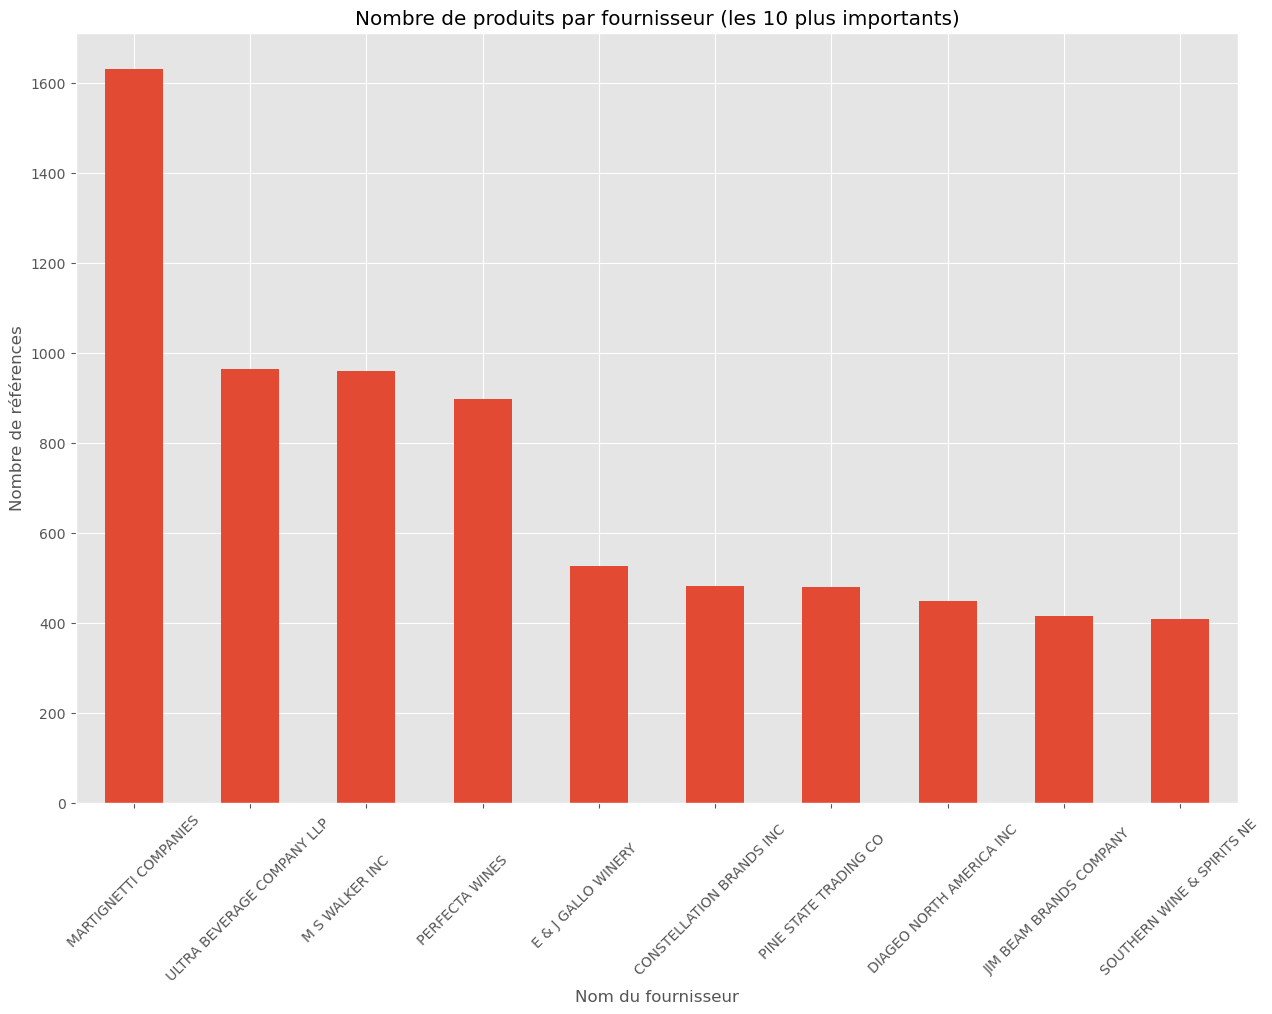

In [76]:
# Créons un diagramme avec les 10 fournisseurs les plus importants. En réalité c'est surtout les 10 qui fournissent le plus de produits
figure, ax = plt.subplots(figsize = (15, 10)) # Création de la figure et de l'ax
# Définition de l'ax la valeur, la limite de 10 fournisseurs et le type de graphique
ax = df_temp['Vendor_Name'].value_counts() \
        .head(10)\
        .plot(kind = 'bar')
ax.set_title('Nombre de produits par fournisseur (les 10 plus importants)') # Titre du graphique
ax.set_xlabel('Nom du fournisseur') # Titre de l'axe X
ax.set_ylabel('Nombre de références') # Titre de l'axe Y
ax.tick_params(axis ='x', labelrotation = 45); # Rotation des noms des fournisseursa fin qu'ils ne soient pas à la verticale

In [77]:
# Ensuite regardons la distribution des prix d'achat et de prix de vente
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


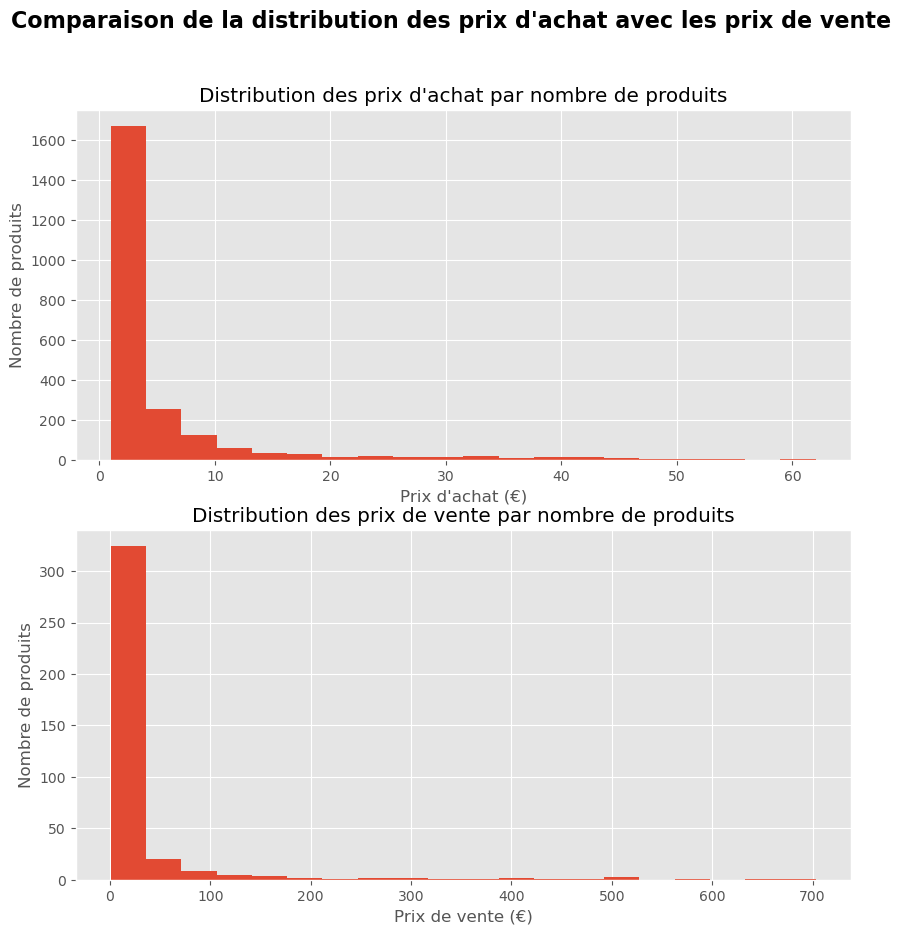

In [78]:
# Créons donc un graphique pour les prix d'achat et les prix de vente
# Création du cadre
fig, (ax0, ax1) = plt.subplots(ncols = 1,
                                 nrows = 2,
                                 figsize = (10,10))

# Création du premier graphique (prix d'achat)
Achat = ax0.hist(df_temp['Purchasing_Price'].value_counts(), 
                 bins = 20)
ax0.set(title = '''Distribution des prix d'achat par nombre de produits''',
        ylabel = 'Nombre de produits',
        xlabel = '''Prix d'achat (€)''');

# Création du premier graphique (prix d'achat)
Vente = ax1.hist(df_temp['Selling_Price'].value_counts(), 
                 bins = 20)
ax1.set(title = '''Distribution des prix de vente par nombre de produits''',
        ylabel = 'Nombre de produits',
        xlabel = '''Prix de vente (€)''');

# Titre du cadre
fig.suptitle("Comparaison de la distribution des prix d'achat avec les prix de vente", fontsize = 16, fontweight = 'bold');

In [79]:
# Maintenant regardons la distribution des quantités et du volume
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


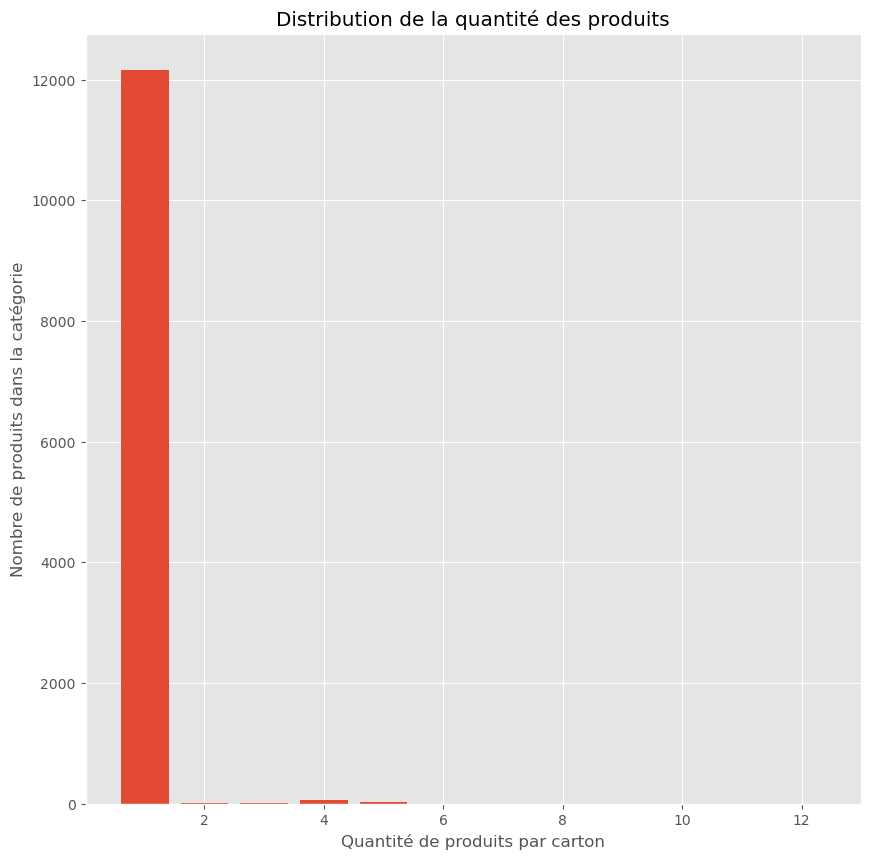

In [80]:
# Visualisatons d'abord la quantité
# Créons le cadre
fig, ax = plt.subplots(figsize = (10, 10))

# Créons le graphique
graphique = ax.bar(df_temp['Quantity'].unique(), df_temp['Quantity'].value_counts())
ax.set(title = "Distribution de la quantité des produits",
       xlabel = "Quantité de produits par carton",
       ylabel = "Nombre de produits dans la catégorie");

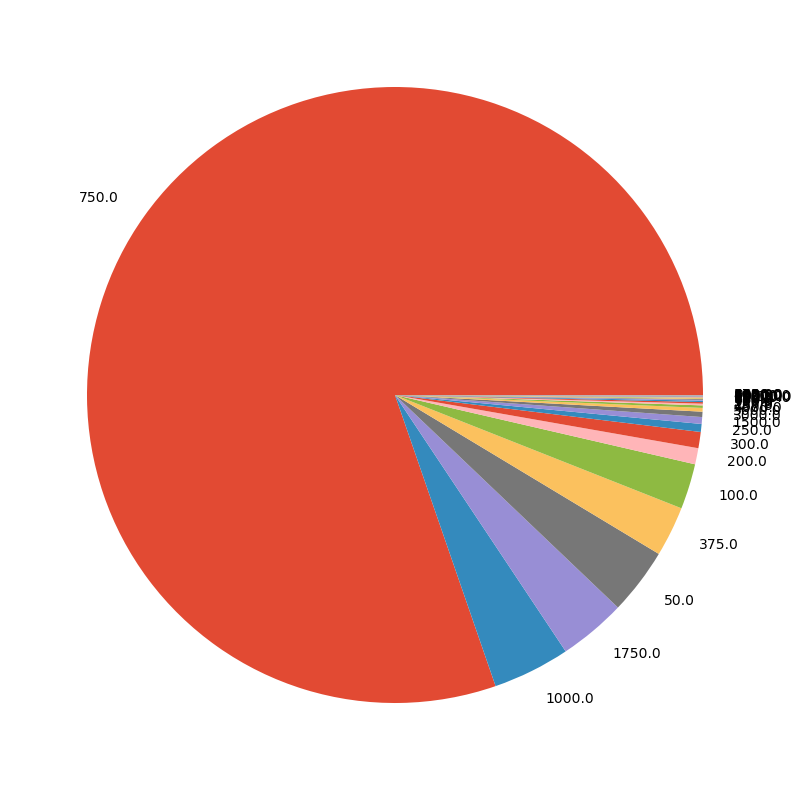

In [81]:
# Visualisation du Volume par produit
# Création du cadre
fig, ax = plt.subplots(figsize = (10,10))

# Création du graphique
graphiuqe = ax.pie(df_temp['Volume_Per_Unit_ml'].value_counts(), labels = df_temp['Volume_Per_Unit_ml'].unique())

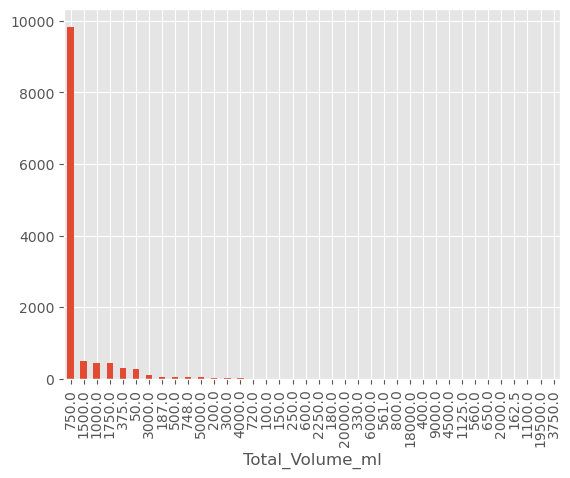

In [82]:
# Création rapide via la commande .plot
df_temp['Total_Volume_ml'].value_counts().plot(kind = 'bar');

## Chapitre 4: Relations entre les caractéristiques

In [83]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


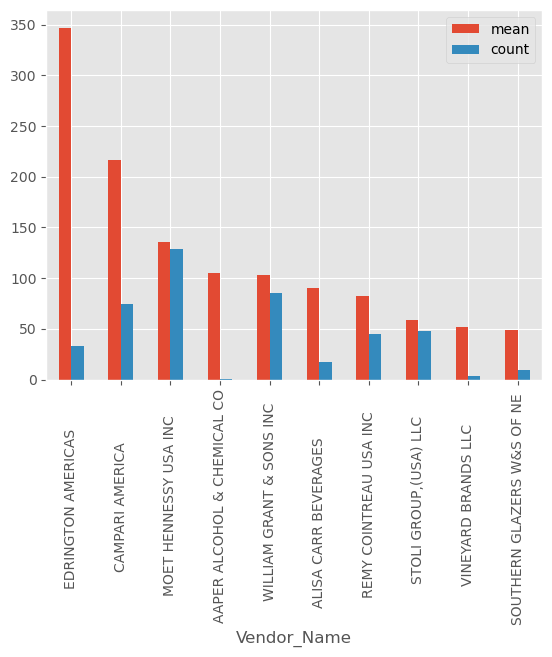

In [84]:
# Etudions le prix d'achat en fonction du fournisseurs
# Groupons d'abord la base de données par les vendeurs et ajoutons-y que le prix d'achat
# Ensuite prenons la moyenne et le nombre de produits
# Puis mettons les dans l'ordre décroissant
# Ensuite affichons que les 10 prémière valeurs
# Puis créons le graphique 
df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

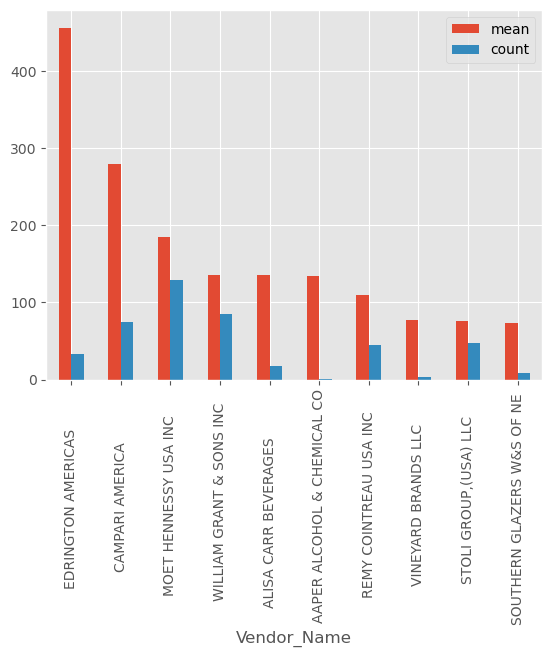

In [85]:
# Etudions maintenant la même chose mais en fonction du prix de vente moyen
df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

In [86]:
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [87]:
# Etudions maintenant la même chose mais en fonciton de la marge donc prix d'achat vs prix de vente
# Pour cela créons donc un colonne marge
df_temp.insert(3, 'Profit', df_temp['Selling_Price'].values - df_temp['Purchasing_Price'].values)
df_temp.head()

,Product_ID,Prodcut_Name,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,3.71,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,8.32,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,8.53,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,8.88,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,4.05,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [88]:
# Changeons aussi de place la colonne prix d'achat afin que cela soit mieux organisé et plus instictif
# Rename de la colonnes afin de pouvoir créer celle qui sera au bon endroit directement avec le bon nom
df_temp.rename(columns = {'Purchasing_Price' : 'Purch'}, inplace = True)
# Déplacement de la colonne en créant une nouvelle avec ses valeurs
df_temp.insert(2, 'Purchasing_Price', df_temp['Purch'].values)
# Suppréssion de la colonnes au mauvais endroit
df_temp.drop('Purch', axis = 1, inplace = True)
df_temp.head()

,Product_ID,Prodcut_Name,Purchasing_Price,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,9.28,12.99,3.71,1,750.0,750.0,1,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,28.67,36.99,8.32,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,30.46,38.99,8.53,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,26.11,34.99,8.88,1,750.0,750.0,1,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,10.94,14.99,4.05,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.


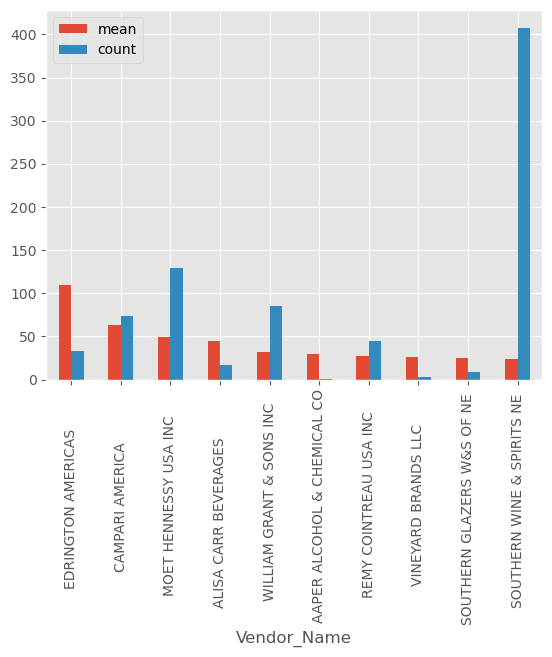

In [89]:
# Création du graphique
df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

### Maintenant analysons cela en fonction du volume par carton par vendeur

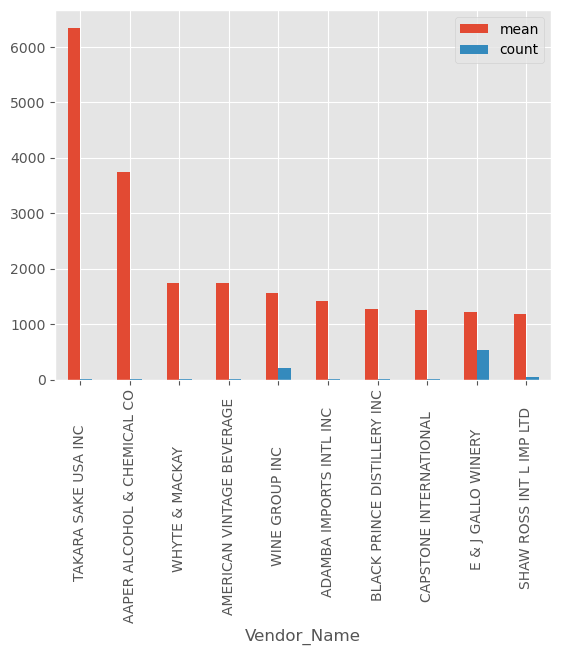

In [90]:
# Création du graphique total_volume par vendeur
df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

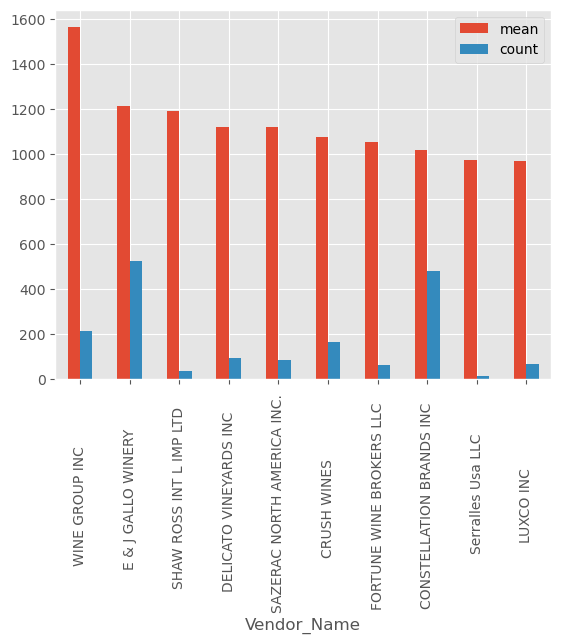

In [91]:
# Le graphique au-dessus n'est pas super représentatif puisque les vendeurs avec les plus gros volume totaux sont ceux qui n'ont qu'un produit. 
# Il faut donc analyser en fonction de ceux qui nous vendent déjà pas mal de produits pour que cela soit représentatif.
# Le code est le même, nous allons juste ajouter un filtre en plus.
df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean', 'count']) \
    .query('count > 10') \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

#### Observons en fonction du nombre de produits 
(Cela nous aidera à savoir si nos fournisseurs sont assez variés ou, au contraire, si nous nous fournisson surtout parmis un fournisseur) 

(Ceci a déjà été vu plus haut donc ici j'utiliserai une autre manière de coder le graphique)

<Axes: xlabel='Vendor_Name'>

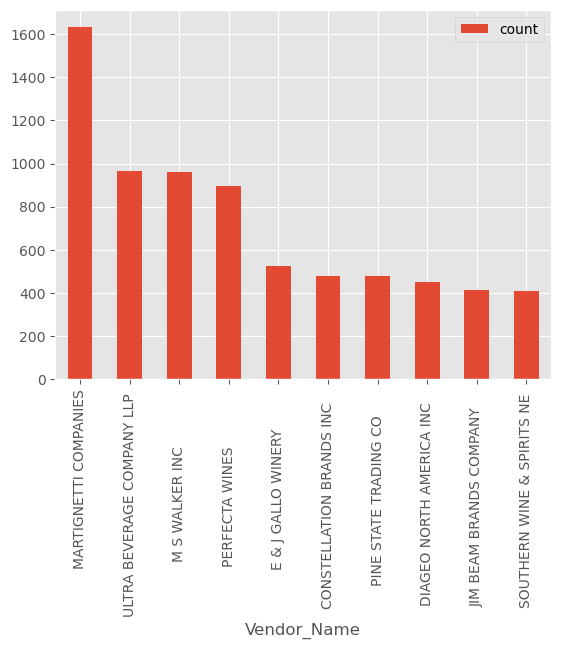

In [92]:
# Création du graphique
df_temp.groupby(by = 'Vendor_Name')['Product_ID'] \
    .agg(['count']) \
    .sort_values('count', ascending = False) \
    .head(10) \
    .plot(kind = 'bar')

In [93]:
df_temp.head(10)

,Product_ID,Prodcut_Name,Purchasing_Price,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,9.28,12.99,3.71,1,750.0,750.0,1,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,28.67,36.99,8.32,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,30.46,38.99,8.53,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,26.11,34.99,8.88,1,750.0,750.0,1,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,10.94,14.99,4.05,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
5,77,Three Olives Espresso Vodka,10.39,12.99,2.60,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
6,79,Three Olives Loopy Vodka,9.62,14.99,5.37,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
7,115,Belvedere Vodka,21.37,27.99,6.62,1,1000.0,1000.0,1,8112,MOET HENNESSY USA INC
8,126,Grey Goose Vodka,20.14,32.99,12.85,1,1000.0,1000.0,1,480,BACARDI USA INC
9,168,Three Olives Strawberry,8.95,12.99,4.04,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.


Est-ce que plus le prix d'achat est élevé, plus la marge l'est aussi ?

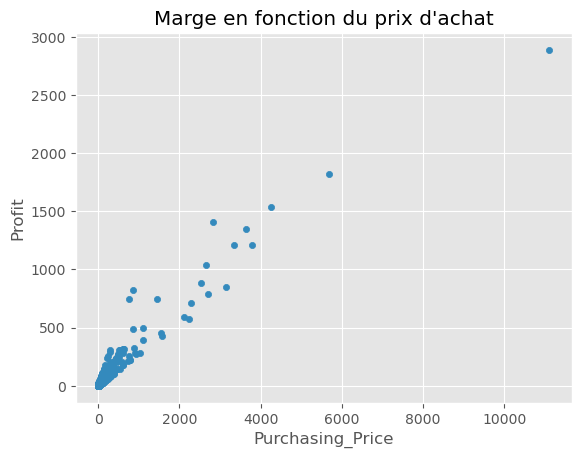

In [94]:
# Création du graphique à paritr d'un troisième type de commande
df_temp.plot(kind = 'scatter',
             x = 'Purchasing_Price',
             y = 'Profit',
             title = "Marge en fonction du prix d'achat");
# Elle dépend donc du prix d'achat. Car plus le prix d'ahcat monte, plus la marge monte aussi

Et est-ce qu'elle dépend du prix de vente ?

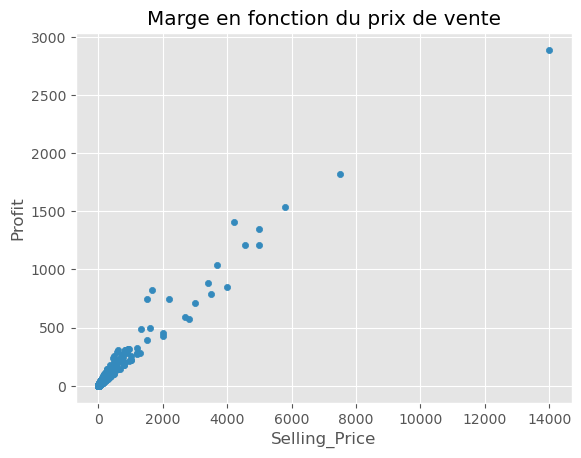

In [95]:
# Création du graphique
df_temp.plot(kind = 'scatter',
             x = 'Selling_Price',
             y = 'Profit',
             title = 'Marge en fonction du prix de vente');
# On observe donc que la marge dépend également du prix de vente

## Graphique résumant l'EDA parmis les fournisseurs

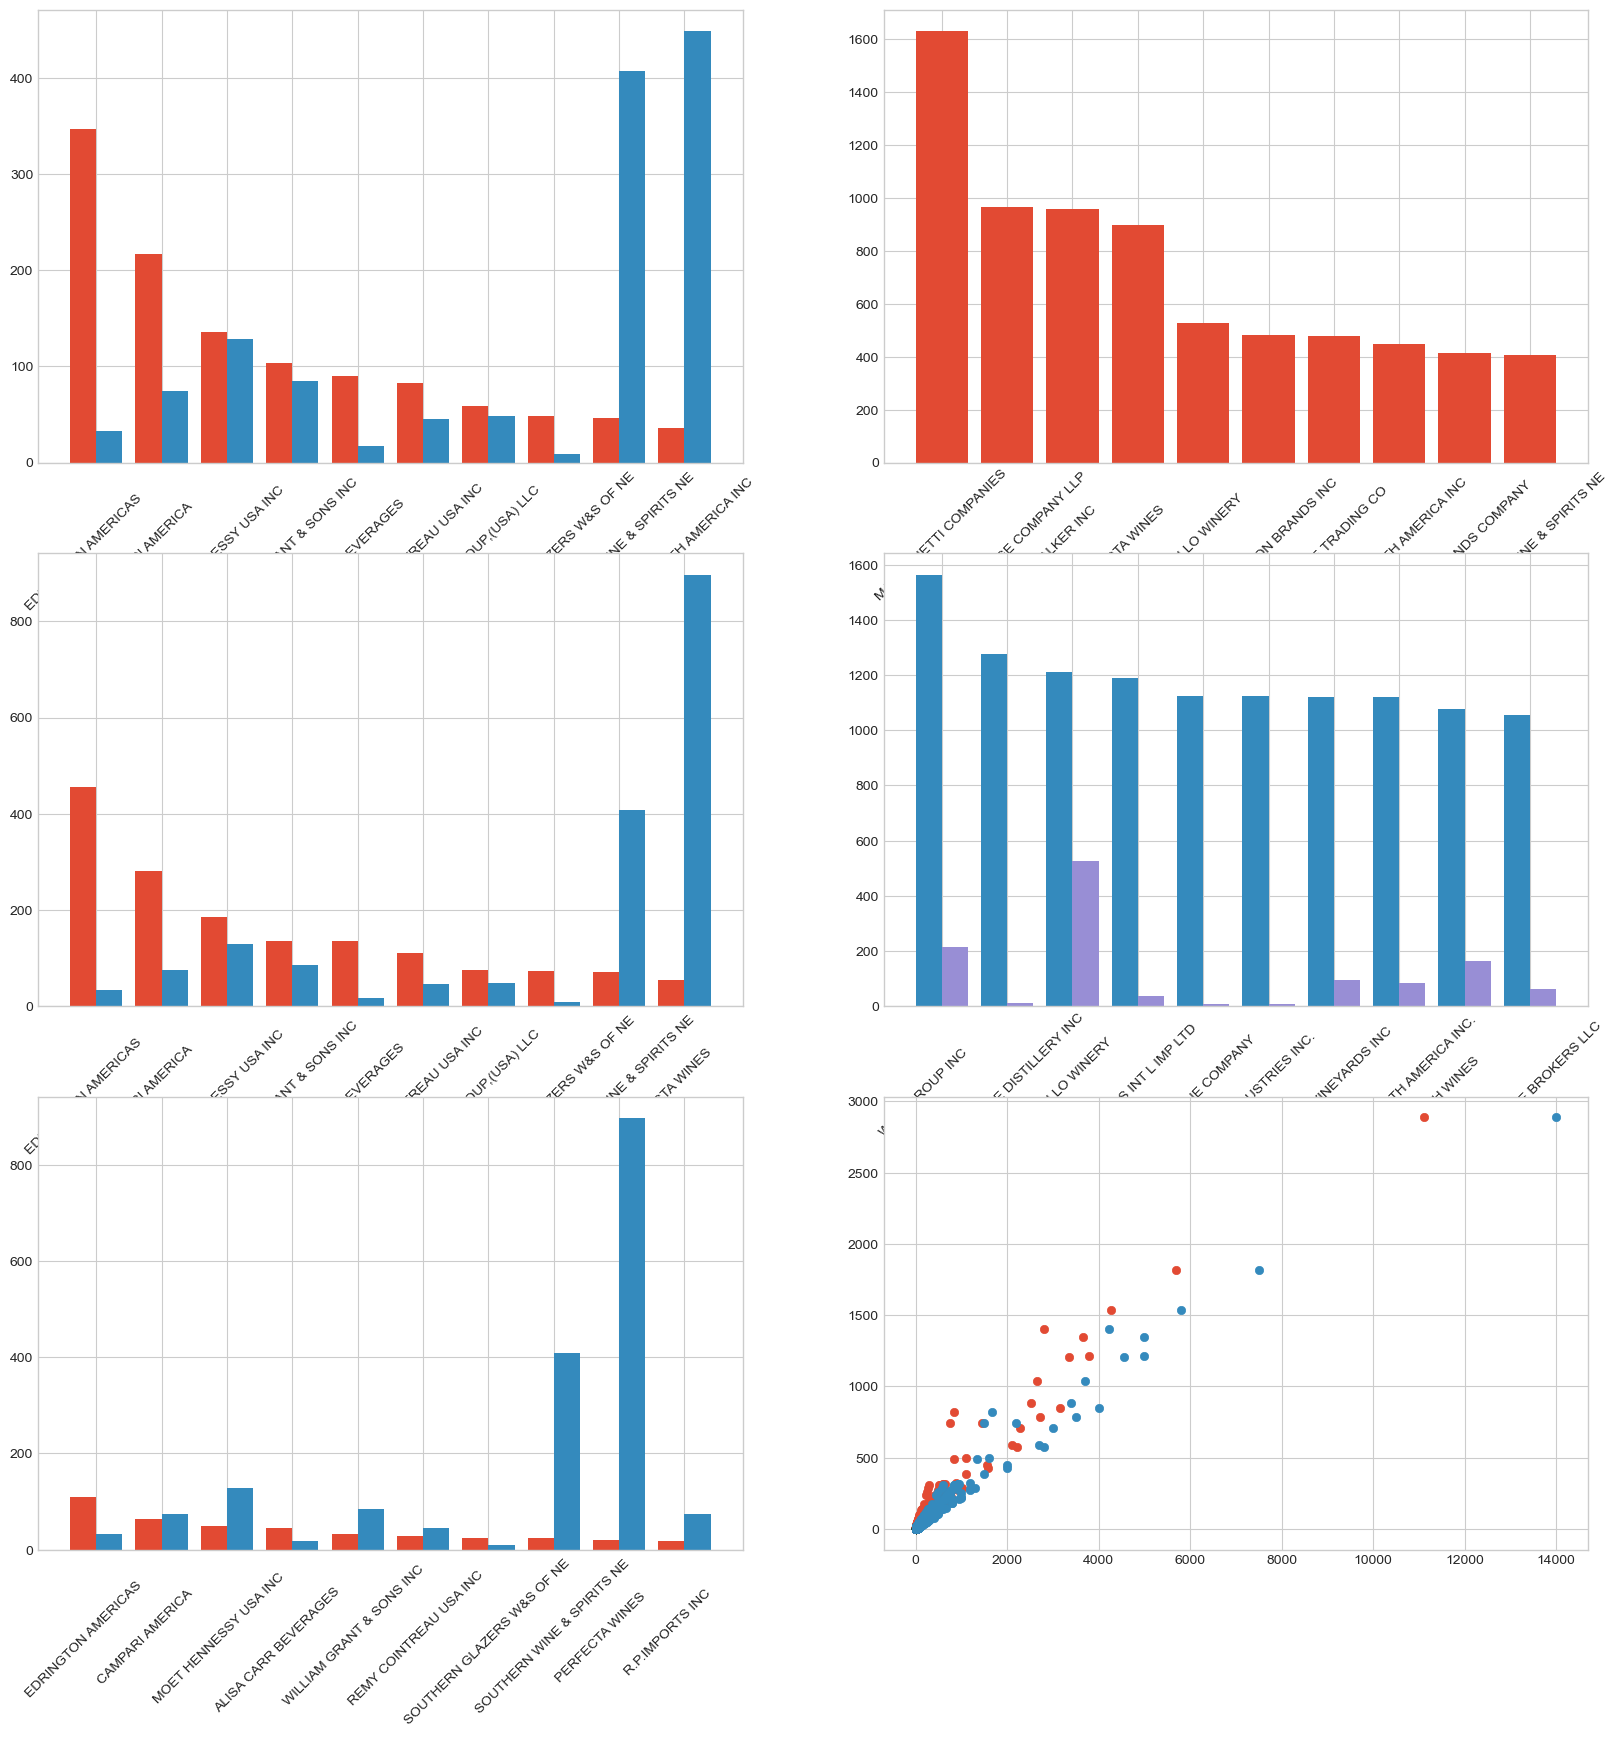

In [144]:
# Création du cadre et set up des gaphriques
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(ncols = 2,
                                                      nrows = 3,
                                                      figsize = (20, 20))


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX D'ACHAT VS FOURNISSEUR
# D'abord il faut créer un df 
df_achat_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_achat_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_achat_fourni['Vendor_Name']))

# Création du graphique
ax0.bar(X_axis - 0.2, df_achat_fourni['mean'], 0.4, label = 'mean')
ax0.bar(X_axis + 0.2, df_achat_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax0.set_xticks(X_axis, df_achat_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX DE VENTE VS FOURNISSEUR
# Le même processus a lieu
df_vente_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_vente_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_vente_fourni['Vendor_Name']))

# Création du graphique
ax2.bar(X_axis - 0.2, df_vente_fourni['mean'], 0.4, label = 'mean')
ax2.bar(X_axis + 0.2, df_vente_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax2.set_xticks(X_axis, df_vente_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS FOURNISSEUR
# Le même processus a lieu
df_marge_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_marge_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_marge_fourni['Vendor_Name']))

# Création du graphique
ax4.bar(X_axis - 0.2, df_marge_fourni['mean'], 0.4, label = 'mean')
ax4.bar(X_axis + 0.2, df_marge_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax4.set_xticks(X_axis, df_marge_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE NB DE PRODUITS VS FOURNI
# Création du dataframe
df_produits = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Product_ID'] \
    .agg(['count']) \
    .sort_values('count', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index à un colonne
df_produits.reset_index(inplace = True)

# Création du graphique
ax1.bar(df_produits['Vendor_Name'], df_produits['count'])

# On change la rotation des labels afin qu'ils soient lisibles
ax1.set_xticks(df_produits['Vendor_Name'], df_produits['Vendor_Name'], rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
# GRAPHIQUE VOLUME TOTAL MOYEN VS FOURNISSEUR
df_volume = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean','count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index à un colonne
df_volume.reset_index(inplace = True)

# Création du graphique
ax3.bar(df_volume['Vendor_Name'], df_volume['count'])

# Création du graphique
ax3.bar(X_axis - 0.2, df_volume['mean'], 0.4, label = 'mean')
ax3.bar(X_axis + 0.2, df_volume['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax3.set_xticks(X_axis, df_volume['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS PRIX ACHAT ET VENTE
# Création du graphique en fonction du prix d'achat
ax5.scatter(x = df_temp['Purchasing_Price'],
            y = df_temp['Profit']);

# Ajout du graphique en fonction du prix de vente 
ax5.scatter(x = df_temp['Selling_Price'],
            y = df_temp['Profit']);

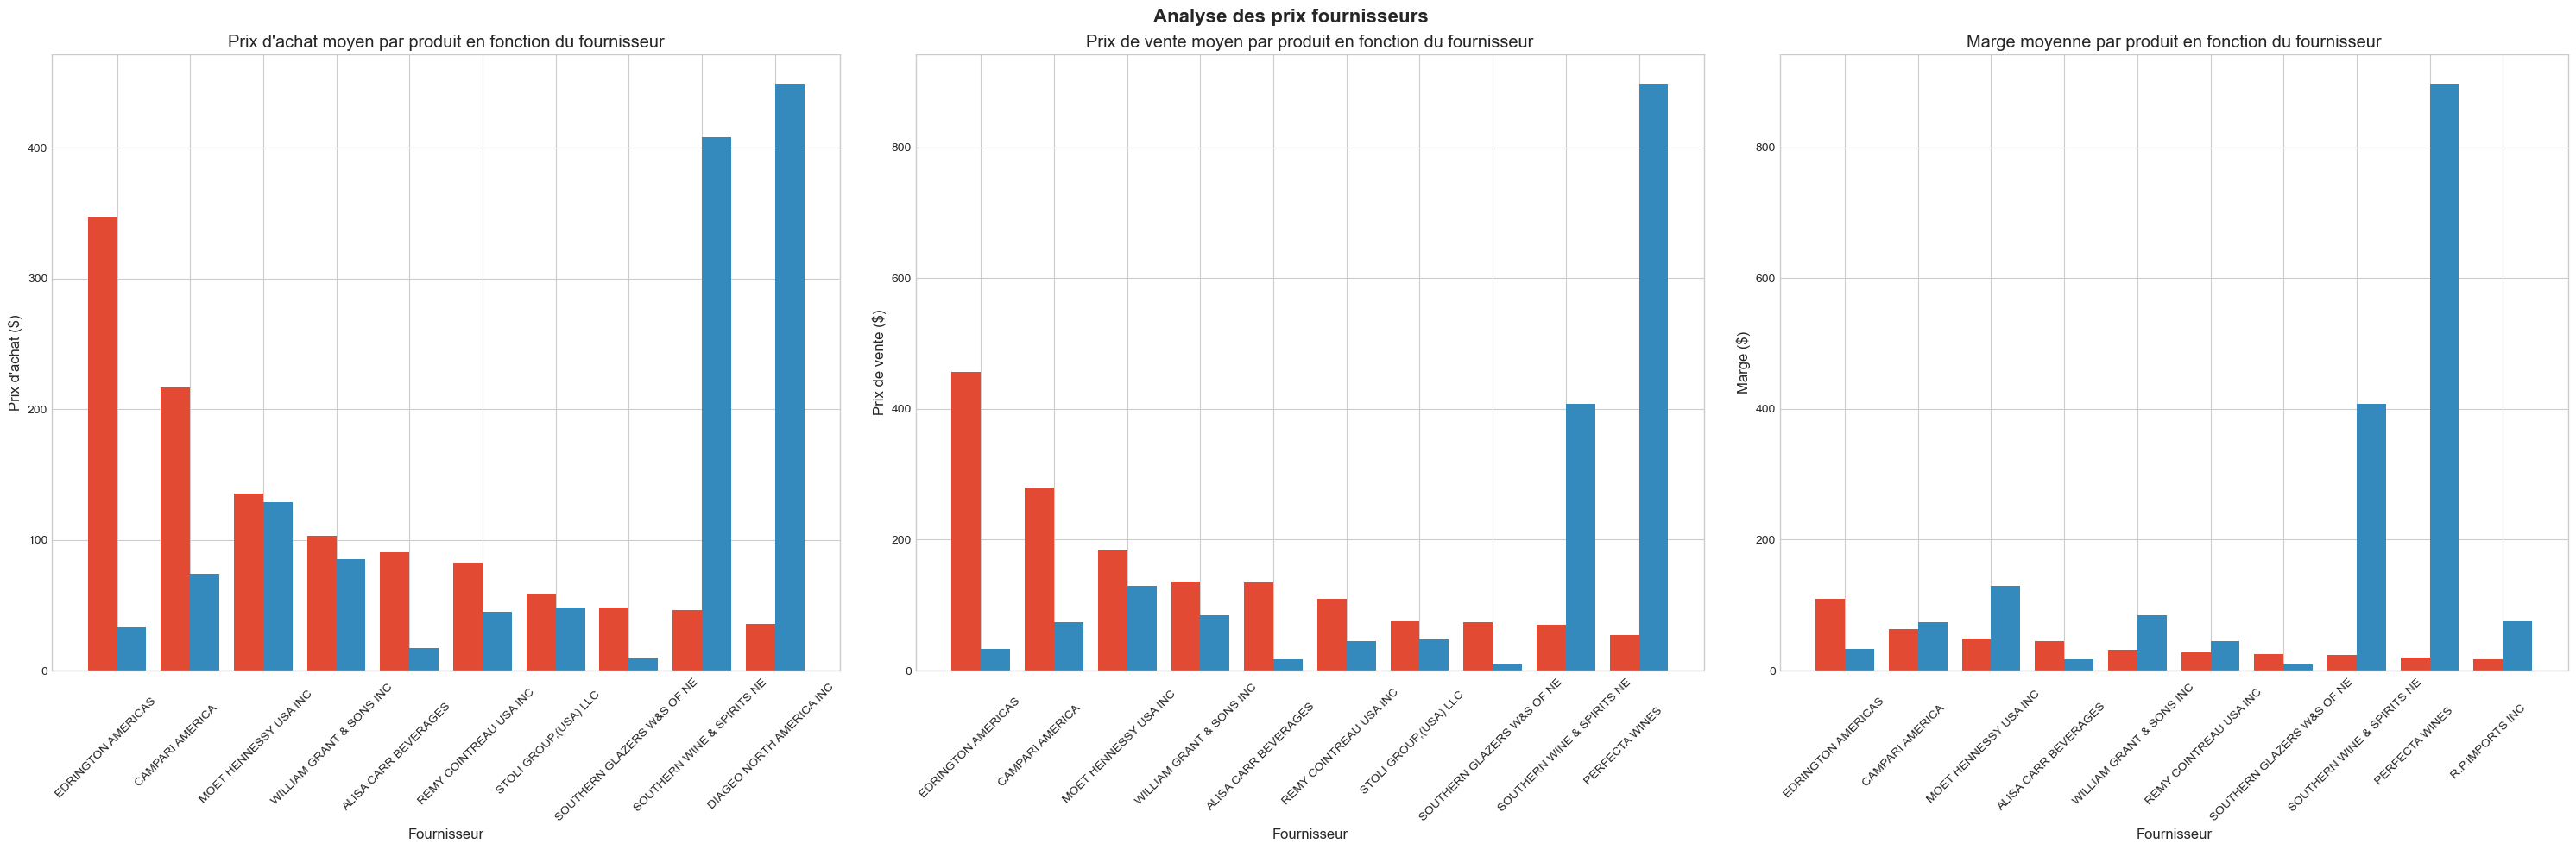

In [141]:
# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
# Création du cadre et set up des gaphriques
fig, (ax0, ax2, ax4) = plt.subplots(ncols = 3,
                                    nrows = 1,
                                    figsize = (30, 10))


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX D'ACHAT VS FOURNISSEUR
# D'abord il faut créer un df 
df_achat_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_achat_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_achat_fourni['Vendor_Name']))

# Création du graphique
ax0.bar(X_axis - 0.2, df_achat_fourni['mean'], 0.4, label = 'mean')
ax0.bar(X_axis + 0.2, df_achat_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax0.set_xticks(X_axis, df_achat_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax0.set(title = "Prix d'achat moyen par produit en fonction du fournisseur",
        xlabel = 'Fournisseur',
        ylabel = "Prix d'achat ($)")


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX DE VENTE VS FOURNISSEUR
# Le même processus a lieu
df_vente_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_vente_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_vente_fourni['Vendor_Name']))

# Création du graphique
ax2.bar(X_axis - 0.2, df_vente_fourni['mean'], 0.4, label = 'mean')
ax2.bar(X_axis + 0.2, df_vente_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax2.set_xticks(X_axis, df_vente_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax2.set(title = 'Prix de vente moyen par produit en fonction du fournisseur',
        xlabel = 'Fournisseur',
        ylabel = 'Prix de vente ($)')


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS FOURNISSEUR
# Le même processus a lieu
df_marge_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_marge_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_marge_fourni['Vendor_Name']))

# Création du graphique
ax4.bar(X_axis - 0.2, df_marge_fourni['mean'], 0.4, label = 'mean')
ax4.bar(X_axis + 0.2, df_marge_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax4.set_xticks(X_axis, df_marge_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax4.set(title = 'Marge moyenne par produit en fonction du fournisseur',
       xlabel = 'Fournisseur',
       ylabel = 'Marge ($)')



# Titre du graphique
fig.suptitle('Analyse des prix fournisseurs', fontsize = 16, fontweight = 'bold');

plt.tight_layout()
plt.show()

In [131]:
fig.savefig('Analyse des prix fournisseurs.png')